# Notebook 01
- Renomeação das colunas
- Formatação dos tipos dos dados
- Checagem e atribuição de dados faltantes
- Limpeza dos dados
- Análise descritiva dos dados categóricos e numéricos

# 0.0 Imports

In [2]:
import os
import pathlib
import math
import inflection
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import numpy             as np


from IPython.core.display import HTML

## 0.1 Helper Functions

In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

In [4]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.2 File and directory paths

In [5]:
# Diretório raíz
PACKAGE_ROOT = pathlib.Path('.').resolve().parent

# Caminhos para os diretórios dos dados
DATADIR = os.path.join(PACKAGE_ROOT, 'data')
DATADIR_RAW = os.path.join(DATADIR, 'raw')
DATADIR_INTERIM = os.path.join(DATADIR, 'interim')
DATADIR_PREPROCESSED = os.path.join(DATADIR, 'preprocessed')

# Files raw Data
FILE_TRAIN = os.path.join(DATADIR_RAW,'train.csv')
FILE_STORE = os.path.join(DATADIR_RAW,'store.csv')


## 0.3 Data Loading

In [6]:
df_sales_raw = pd.read_csv(   FILE_TRAIN,
                    low_memory= False # Ler o arquivo por completo de uma só vez, e não em pedaços.
                    )

df_store_raw = pd.read_csv(   FILE_STORE,
                    low_memory= False # Ler o arquivo por completo de uma só vez, e não em pedaços.
                    )

# 1.0 Data Description

## 1.1 Data Visualization

In [7]:
df_sales_raw.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [8]:
df_store_raw.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


É necessário realizar o merge entre as tabelas.

In [9]:
df_raw = pd.merge(  df_sales_raw, 
                    df_store_raw,
                    how= 'left', # A ordem dos dados será da tabela à esquerda (e somente as chaves contendo nessa tabela são preservadas )
                    on= 'Store'
                    )
df_raw.shape

(1017209, 18)

In [10]:
df_raw.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


## 1.2 Rename columns

**A importância de se renomear as colunas é para facilitar o entendimento dos dados quando se estiver fazendo análise mais profundas, e assim não perder tempo para tentar entender o que significa cada atributo.**

Nessa seção se faz necessário entender o que significa cada coluna. Por tanto, verifique o documento 'Entendimento_dados' na pasta **Docs**.

In [11]:
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [12]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
            'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
            'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']

# Estilo Snake Case: Todas as letras são minúsculas e separa por underline (_).
# Criando uma função
snakecase = lambda x: inflection.underscore (x)

# Aplicando a função na lista e retornando outra lista com as novas palavras.
cols_new = list(map( snakecase, cols_old ))

# Rename
df_raw.columns = cols_new

## 1.3 Data info general

In [13]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   store                         1017209 non-null  int64  
 1   day_of_week                   1017209 non-null  int64  
 2   date                          1017209 non-null  object 
 3   sales                         1017209 non-null  int64  
 4   customers                     1017209 non-null  int64  
 5   open                          1017209 non-null  int64  
 6   promo                         1017209 non-null  int64  
 7   state_holiday                 1017209 non-null  object 
 8   school_holiday                1017209 non-null  int64  
 9   store_type                    1017209 non-null  object 
 10  assortment                    1017209 non-null  object 
 11  competition_distance          1014567 non-null  float64
 12  competition_open_since_month

**DESCRIÇÃO:**
* 18 Colunas e 1.017.209 linhas (Máx) 
* 1 coluna data = date (Falta mudar o formato de data)
* 4 Colunas Categóricas = state_holiday (Verificar se o formato está correto), store_type, assortment, promo_interval.
* 13 colunas Numéricas
* 6 colunas com dados faltantes: competition_distance, competition_open_since_month,
competition_open_since_year, promo2_since_week, promo2_since_year, promo_interval.

In [14]:
# Como começaremos o processo de modificação da base de dados, iremos fazer uma cópia para cada sessão.
df1 = df_raw.copy()

## 1.4 Modifield type

In [15]:
# Verificando o tipo de dado
df1['state_holiday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: state_holiday, dtype: int64

In [16]:
df1['date'] = pd.to_datetime(df_raw['date'])


## 1.5 Check NA

In [17]:
# Percentual dos dados faltantes
(df1.isna().sum() / len(df1))*100

store                            0.000000
day_of_week                      0.000000
date                             0.000000
sales                            0.000000
customers                        0.000000
open                             0.000000
promo                            0.000000
state_holiday                    0.000000
school_holiday                   0.000000
store_type                       0.000000
assortment                       0.000000
competition_distance             0.259730
competition_open_since_month    31.787764
competition_open_since_year     31.787764
promo2                           0.000000
promo2_since_week               49.943620
promo2_since_year               49.943620
promo_interval                  49.943620
dtype: float64

## 1.6 Fillout NA

Nessa seção, se faz necessário entender como as regras de negócio podem impactar os dados faltantes e se por meio disso verificar se é possível preencher.

### competition_distance
Distância mais próxima de um concorrente

In [18]:
# máxima distancia do competidor
df1['competition_distance'].max()

75860.0

In [19]:
#competition_distance 
# Deletando as linhas com dados faltantes em competition_distance por não ser representativo.
# Entretanto, olhando com uma visão de negócio, pode ser que os valores faltantes existam por causa de um distanciamento muito grande com os competidores, podemos assim substituir os dados faltantes por um valor expressivo de 150.000 milhas.
df1['competition_distance']=df1['competition_distance'].apply(lambda x: 150000 if math.isnan(x) else x)

### competition_open_since_ [month / year]

**Definição:** Mês aproximado que o concorrente mais próximo foi aberto.
- **Sugestão 01:** Pode ser que os concorrentes já existiam muito antes das lojas do Rossman abrirem, portanto, podemos adotar como um mês e ano (data) anterior a própria abertura da loja, podendo ser o mesmo mês, mas com um ano a menos que o original. **Caso não tenha essa data, podemos atribuir a menor data de cada loja como a data de abertura**.

- **Sugestão 02:** Podemos adotar a mesma data da coluna date para os dados faltantes, anotando o mês/ano.
- **Sugestão 03:** Podemos adotar a menor data da coluna date para retirar o mês/ano e adicionar aos valores faltantes.  

In [20]:
# Idealizando a hipótese 2
#competition_open_since_month
df1['competition_open_since_month']=df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

#competition_open_since_year
df1['competition_open_since_year']=df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

### promo2_since_[week / year]

**Description:** Descreve o ano e a semana do calendário em que a loja começou a participar do Promo2
- **Sugestão 1:** Pode ser que os dados faltantes sejam pq não há promoção, podemos substituir pela data original.

In [21]:
#promo2_since_week
df1['promo2_since_week']=df1.apply(lambda x: x['date'].month if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)
#promo2_since_year               
df1['promo2_since_year']=df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)


In [22]:
df1['promo2_since_year'].unique()

array([2015., 2010., 2011., 2012., 2009., 2014., 2013.])

### promo_interval

**Description:** Descreve os intervalos consecutivos em que a Promo2 é iniciada, nomeando os meses em que a promoção é iniciada novamente.
Por exemplo. "Fevereiro, maio, agosto, novembro" significa que cada rodada começa em fevereiro, maio, agosto, novembro de qualquer ano para essa loja
- **Sugestão 1:** Anotar zero para valores faltantes e criar outra coluna adotando a regra de que se o mês da coluna Date não estiver na coluna promo_interval, significa que aquela venda não estava no dia de promoção.

In [23]:
# Verificar o formato dos meses
df1['promo_interval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [24]:
# Primeiro passo: Criar um dicionário que identifica os meses
month_map = {1: 'Jan', 2:'Feb', 3:'Mar', 4: 'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'} 

# Segundo passo: Preencher os vazios com zero
df1['promo_interval'] = df1['promo_interval'].fillna( 0 )

# Terceiro passo: Criar um nova coluna que contenha os meses de venda como texto
df1['month_map'] = df1['date'].dt.month.map(month_map)

# Quarto passo: Criar uma lógica que seja capaz de definir se no mês da venda tinha promoção promo2
df1['is_promo'] = df1[['month_map','promo_interval']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

### Check again NA

In [25]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.7 Descriptive Statistical

### Change dtypes

In [26]:
df1['promo2_since_week'] = df1['promo2_since_week'].astype('int64')
df1['promo2_since_year'] = df1['promo2_since_year'].astype('int64')
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype('int64')
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype('int64')

In [27]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [28]:
num_attributes = df1.select_dtypes(include=['int64','float64'])
cat_attributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

## 1.7.1 Numerical Attributes

In [29]:
# Central Tendency - Mean, Median (Métricas que resume a representatividade dos dados)
# O método Apply por default o axis = 0, logo ele aplica coluna a coluna
ct1 = pd.DataFrame(num_attributes.apply( np.mean )).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
# Dispersion - std, min, max, range, skew, kurtosis (Medidas de dispersão em relação a média)
# skew : Como é a deformação da distribuição em relação a normal, se a deformação for mais para a direita teremos uma skew positiva, se for mais para a esquerda teremos uma skew negativa.
# Kurtosis: Métrica em relação a concentração dos dados, quanto maior a Curtose positiva, maior será o pico de concentração dos dados. Entretanto, quanto menor a Curtose, mais dispersos serão os dados, achatando ainda mais minha curva de distribuição.
d1 = pd.DataFrame(num_attributes.apply( np.std )).T
d2 = pd.DataFrame(num_attributes.apply( min )).T
d3 = pd.DataFrame(num_attributes.apply( max )).T
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew() )).T
d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() )).T
# Concat
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean','median', 'standart','skew','kurtosis']
m


,attributes,min,max,range,mean,median,standart,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,150000.0,149980.0,5805.577526,2330.0,10654.360026,7.492361,88.374150
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


**Forma simplificada para demonstrar a descrição estátistica dos dados numéricos:**

In [30]:
skew = pd.DataFrame(num_attributes.apply( lambda x: x.skew() ))
kurtosis = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() ))
range = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() ))
describe = pd.DataFrame(num_attributes.describe()).T
describe['range'] = range
describe['skew'] = skew
describe['kurtosis'] = kurtosis
describe = describe.reset_index()
describe = describe.rename(columns={'index':'Attributes'})
describe

,Attributes,count,mean,std,min,25%,50%,75%,max,range,skew,kurtosis
0,store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0,1114.0,-0.000955,-1.200524
1,day_of_week,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0,6.0,0.001593,-1.246873
2,sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0,41551.0,0.641460,1.778375
3,customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0,7388.0,1.598650,7.091773
4,open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0,1.0,-1.758045,1.090723
5,promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0,1.0,0.487838,-1.762018
6,school_holiday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0,1.0,1.677842,0.815154
7,competition_distance,1017209.0,5805.577526,10654.365263,20.0,710.0,2330.0,6910.0,150000.0,149980.0,7.492361,88.374150
8,competition_open_since_month,1017209.0,6.786849,3.311087,1.0,4.0,7.0,10.0,12.0,11.0,-0.042076,-1.232607
9,competition_open_since_year,1017209.0,2010.324840,5.515593,1900.0,2008.0,2012.0,2014.0,2015.0,115.0,-7.235657,124.071304


C:\Users\kayss\AppData\Local\pypoetry\Cache\virtualenvs\sales-rossman-wZyGz0MP-py3.9\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

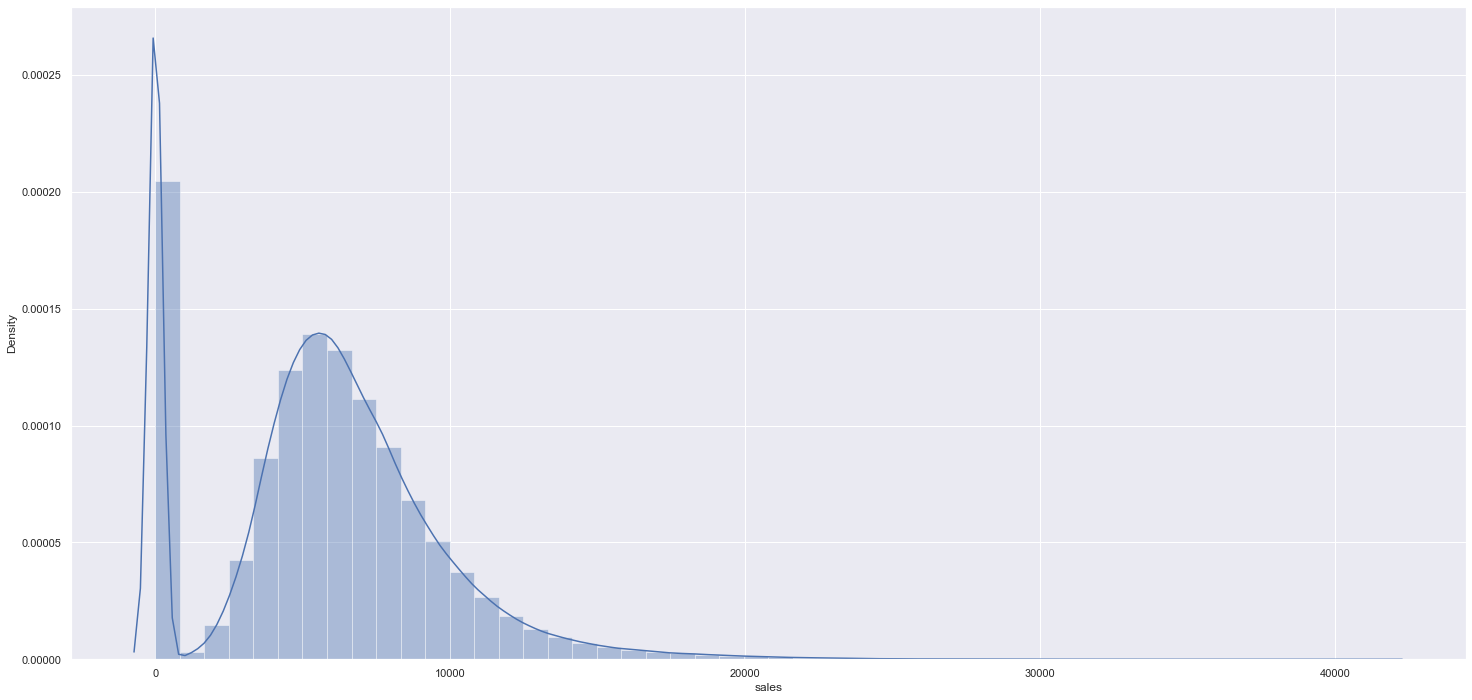

In [31]:
sns.distplot(df1['sales'])

## 1.7.2 Categorical Attributes

In [32]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

Considerando que apenas os atributos state_holiday, store_type e o assortment.

<AxesSubplot:xlabel='assortment', ylabel='sales'>

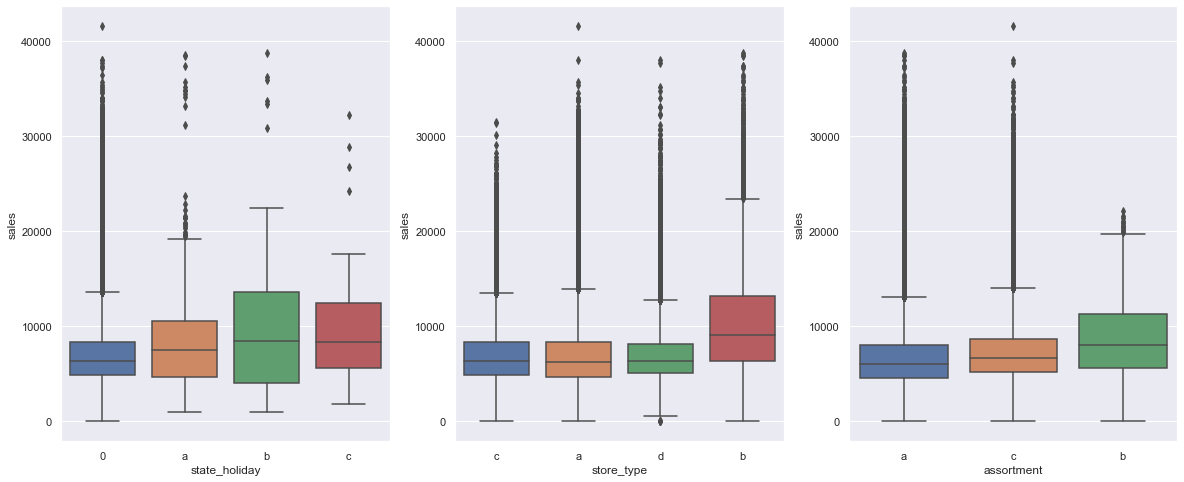

In [33]:
# Fazendo um filtro para retirar os dias que as lojas estiveram fechadas, ou seja, vendas iguais a zero. A coluna Open indica se a loja estava fechada no dia ou não.
aux = df1.loc[df1['open'] != 0]

plt.figure(figsize = [20,8])
plt.subplot(1,3,1)
sns.boxplot(x='state_holiday' , y= 'sales' , data= aux)

plt.subplot(1,3,2)
sns.boxplot(x='store_type' , y= 'sales' , data= aux)

plt.subplot(1,3,3)
sns.boxplot(x='assortment' , y= 'sales' , data= aux)

In [34]:
# aux1 = df1[(df1['state_holiday']!='0') & (df1['sales'] > 0)]
# sns.boxplot(x='state_holiday' , y= 'sales' , data= aux1)

### Observations

**Fig - 1**
- O feriado 'a' representa um feriado genérico, o 'b' representa a Páscoa, o 'c' representa o Natal e o '0' representa que não houve feriado.
- **Insight 01:** Ao observar a representatividade da venda nos feriados, percebe-se que o feriado da páscoa pode ser bem mais rentável que os outros.

# 2.0 Save Data

In [35]:
FILE_PREPROCESSED = os.path.join(DATADIR_PREPROCESSED, 'data_preprocessed_v1.csv')

In [36]:
df1.to_csv(FILE_PREPROCESSED)